## ÍNDICE
* Probabilidad
* Muestra de datos
* Números aleatorios y distribuciones de probabilidad
  * Distribución uniforme
  * Distribución normal
  * Teorema del límite central
  * Distribuciones con colas pesadas
  * Distribución binomial
* Bootstraping
  * Intervalos de confianza


## Probabilidad
Aunque todos tenemos una intuición sobre lo que es la probabilidad puede dar lugar a discusiones a la hora de proponer una definición formal. Sin embargo, nosotros como científicos de datos, podemos quedarnos con una definición pragmática y pensar en la probabilidad de que ocurra un evento en una situación como la proporción de veces que ocurriría dicho evento si la situación se repitiera indefinidamente. Aunque obviamente es una construcción mental resulta útil desde un punto de vista computacional.

Vamos a ver algún ejemplo utilizando un dataset de [traspaso de futbolistas en el mercado de 2022](https://www.kaggle.com/datasets/1d7cba2bf560cf59f97f31397fd748a3bbe1fe2ca9f6dde9edb14295cb70bdf9?resource=download).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
df_traspasos = pd.read_csv("/content/drive/MyDrive/PONTIA - ESTADÍSTICA/1_modulo_matematico/Summer22_FootballTransfers.csv")

Mounted at /content/drive


In [ ]:
# Vamos a ver unos registros del dataset
df_traspasos.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,player_valuje,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,€28.00m,2022-09-01
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,€20.00m,2022-09-01
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,€18.00m,2022-09-01
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,€17.50m,2022-09-01
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,€10.00m,€17.00m,2022-09-01


Podemos calcular la probabilidad de que se produzcan traspasos entre dos paises diferentes simplemente contando cuántas veces ha ocurrido y suponiendo que si la situación continuara se mantendrían las proporciones:

In [ ]:
# Utilizamos una agregación, necesitamos un valor auxiliar para poder sumar
df_traspasos["auxiliar"] = 1
# Suamamos los traspasos que se producen entre dos paises y dividimos por el numero total de traspasos que se han producido.
# Ordenamos los valores para verlos mejor y quitamos el indice para pdoer filtrar por paises.
df_prob = (df_traspasos.groupby(["country_origin_club", "country_new_club"])["auxiliar"].sum()/df_traspasos["auxiliar"].sum()).sort_values(ascending=False).reset_index()

In [ ]:
df_prob.head()

,country_origin_club,country_new_club,auxiliar
0,Italy,Italy,0.110303
1,Spain,Spain,0.054752
2,Germany,Germany,0.035181
3,Turkey,Turkey,0.026608
4,Russia,Russia,0.026312


En general, sin tener ninguna información de dónde juega el jugador, lo más normal es que lo traspasen entre dos equipos italianos (un 11%).

In [ ]:
# Vamos a ver cual sería el traspaso más probable entre dos paises diferentes
df_prob[df_prob["country_origin_club"] != df_prob["country_new_club"]].head()

,country_origin_club,country_new_club,auxiliar
65,Croatia,Slovenia,0.001715
75,England,Scotland,0.001330
81,Wales,England,0.001212
82,Scotland,England,0.001183
83,England,Wales,0.001153


Si el traspaso es internacional, lo más probable es entre croacia y slovenia (0.17%)

## Muestra de datos
Por otro lado, cuando trabajamos con datos estamos siempre ante una muestra de una población superior que contendría todas las observaciones. Desde un punto de vista práctico una muestra es cualquier subconjunto de datos que se extraiga de un conjunto de datos superior. Desde un punto de vista filosófico, en la mayor parte de los casos acceder a la población resulta casi imposible por definición, por ejemplo, si estamos analizando el patrimonio de las personas resulta imposible tenerlo para toda la población mundial.

<img src="https://drive.google.com/uc?id=1RqJ1TplxX2QrEkvzaMHOBSpI8fGghw57" alt="drawing" width="500"/>

Aunque en la práctica, consideraremos que tenemos datos suficientes en la muestra, resulta siempre importante tener esta distinción en cuenta para, en caso de que sea necesario, comprobar si el tamaño muestral es suficiente para tomar asunciones correctas sobre nuestros datos. Aquí el concepto de probabilidad es indispensable ya que la población y la muestra podremos representarla como una distribución de probabilidad.

Pero, ¿cómo generamos muestras? una opción es hacerlo de forma aleatoria, es decir, para cada miembro de la población existe la misma probabilidad de que forme parte de la muestra. Esto se puede hacer con reemplazamiento, es decir, una vez extraido un miembro de la población a la muestra, lo volvemos a incluir en la población de forma que puede ser elegido más de una vez o sin reemplazamiento, en este caso una vez extraido el miembro de la población ya no puede volver elegirse.

En cuanto a qué es mejor, tener una muestra de gran tamaño o una muestra más pequeña pero de mejor calidad habitualmente suele ser más interesante lo segundo. Tener una muestra estadísticamente suficiente pero que sea más completa en cuanto a tipología de datos, que sea más consistente en cuanto a tipos de datos, que esté más limpia y que sea más precisa para cada punto de datos suele ser lo más conveniente.

Un ejemplo clásico es el del Literary Digest pol (https://www.youtube.com/watch?v=JwZo28RKdvU&ab_channel=BusinessInsider).

Como ocurrió en el Literary Digest que sesgó su encuesta hacia personas que tenían un perfil socioeconómico más elevado todos podemos introducir un sesgo en nuestra generación muestral por lo que si, al analizar los datos, encontramos pruebas de sesgo al, por ejemplo, compararlo con algún valor de referencia, debemos siempre repasar la información que estamos utilizando por si algo no tuviera la calidad suficiente o nos faltara información.

Una alternativa al muestreo aleatorio es el muestreo estratificado. En él, la población se divide según los valores de alguno de sus atributos (edad, sexo, etnia, nacionalidad...) y se escogen elementos para la muestra final este formada por elementos suficientes de cada estrato.

Una manera para ganar confianza sobre nuestra muestra consiste en establecer una hipótesis que asegure que no existe sesgo y recabar datos y análisis para intentar validarla.

In [ ]:
# Vamos a calcular las mismas probabilidades pero esta vez sobre una muestra de la población.
df_traspasos_sample = df_traspasos.sample(int(len(df_traspasos)*0.6 ))
# Utilizamos una agregación, necesitamos un valor auxiliar para poder sumar
df_traspasos_sample["auxiliar"] = 1
# Suamamos los traspasos que se producen entre dos paises y dividimos por el numero total de traspasos que se han producido.
# Ordenamos los valores para verlos mejor y quitamos el indice para pdoer filtrar por paises.
df_prob_sample = (df_traspasos_sample.groupby(["country_origin_club", "country_new_club"])["auxiliar"].sum()/df_traspasos_sample["auxiliar"].sum()).sort_values(ascending=False).reset_index()

In [ ]:
df_prob_sample.head()

,country_origin_club,country_new_club,auxiliar
0,Italy,Italy,0.113378
1,Spain,Spain,0.054102
2,Germany,Germany,0.035329
3,Turkey,Turkey,0.026509
4,Russia,Russia,0.025671


In [ ]:
# Vamos a ver cual sería el traspaso más probable entre dos paises diferentes
df_prob_sample[df_prob_sample["country_origin_club"] != df_prob_sample["country_new_club"]].head()

,country_origin_club,country_new_club,auxiliar
72,Croatia,Slovenia,0.001577
75,England,Scotland,0.001478
76,Wales,England,0.001429
81,Scotland,England,0.001281
83,Brazil,Portugal,0.001183


Vemos como para las probabilidades más altas no hay un problema a la hora de calcular los valores utilizando muestras, no tanto así para las probabilidades más bajas. Cuanto más residual sea el evento o efecto que queremos observar menos eficaces serán las técnicas de muestreo.

## Números aleatorio y distribuciones de probabilidad.

Cuando hablamos de distribuciones podemos hablar de la distribución de los datos, es decir, que valores toman los datos o de la distribución estadística o de probabilidad que representa nuestros datos. Más adelante veremos más distribuciones pero, el ejemplo más simple es la distribución uniforme. Si todos los datos tienen la misma probabilidad de ocurrencia estos se distribuyen uniformemente. Sin embargo, si los datos se distribuyen más o menos de forma uniforme podremos suponer que se comporta como una distribución uniforme pero asumiendo cierto error que podrá ser o no aceptable.

In [ ]:
# con el módulo numpy podremos generar números aleatorio siguiendo multitud de distribuciones
import numpy as np

### Distribución uniforme
La distribución uniforme o distribución rectangular describe una situación en la que todos los valores entre dos extremos tienen la misma probabilidad de ocurrencia.

<img src="https://drive.google.com/uc?id=1LAjje8LAxGz-ijmghuxb2QzzLlMDQTMx" alt="drawing" width="300"/>




In [ ]:
# Con este codigo generamos valores aleatorios que se distribuyen con una misma probabilidad entre a y b.
a = 1
b = 8
np.random.randint(a, b)

5

In [ ]:
np.random.randint?

In [ ]:
# vamos a generar un numero grande de numeros, por ejemplo 1000 y ver que la probabilidad de aparicion es la misma para todos
a = 1
b = 8
N_NUMEROS = 1000000
serie = pd.Series(np.random.randint(a, b, size=N_NUMEROS) )

In [ ]:
serie

,0
0,2
1,4
2,3
3,4
4,5
...,...
999995,4
999996,4
999997,7
999998,3


<Axes: >

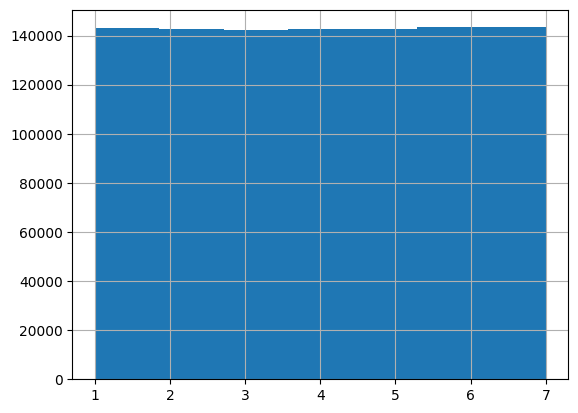

In [ ]:
serie.hist(bins=b-a)

In [ ]:
serie.value_counts(normalize=True)

,proportion
7,0.143362
6,0.143357
1,0.143109
2,0.142812
4,0.142577
5,0.142469
3,0.142314


Esta distribución es muy útil porque puede servir como base para generar computacionalmente otras distribuciones más complejas y nos puede ayudar a simular situaciones y escenarios sencillos.

### Distribución normal

La distribución normal es una de las más icónicas en el mundo de la estadística. Enunciada por Gauss describe una situación en la que el 68% de los datos se encuentra a una distancia de la media de una desviación estandar (positiva o negativa) y el 95% de los datos se encuentran a una distancia de la media de dos desviaciones estandar.


<img src="https://drive.google.com/uc?id=1VhK0NNxDa4V3-rMtYbK-sB50CwszZ21P" alt="drawing" width="500"/>

Hablamos de distribución normal estandarizada cuando referimos esta a la media y dividimos por la desviación estandar. Es decir, una distribución normal donde la media es 0 y la desviación estándar es 1.

Una forma gráfica para saber cómo de parecidos son nuestros datos a una distribución normal es normalizar nuestros datos (restarles la media y dividir entre la desviación estandar) y representarlo vs los cuantiles de una distribución normal. Si la dependencia es lineal, tendremos un buen ajuste.

<img src="https://drive.google.com/uc?id=1XUFWExR2hwTRrsxrbXgTvmkHougjMpZe" alt="drawing" width="500"/>

La distribución normal ha sido clave para el desarrollo de la estadística a lo largo de la historia. Desgraciadamente, los datos que nos encontramos en nuestra labor de data scientist no siempre siguen una distribución normal por lo que no podremos aplicar toda la teoría que se apoya en la distribución normal.


In [ ]:
np.random.normal?

In [ ]:
# Con este codigo generamos valores aleatorios que se distribuyen según la distribución normal
mu = 0
sd = 1
N_NUMEROS = 1000000
serie = pd.Series(np.random.normal(mu, sd, size=N_NUMEROS))

In [ ]:
serie

,0
0,0.421442
1,0.232901
2,0.394735
3,0.934429
4,0.270963
...,...
999995,1.049398
999996,0.092193
999997,-0.728197
999998,-0.353443


<Axes: >

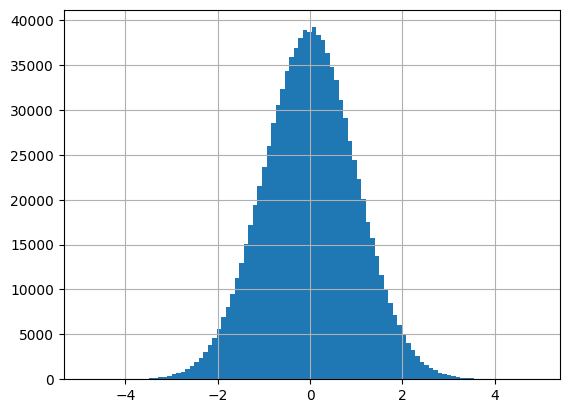

In [ ]:
serie.hist(bins = min(100, N_NUMEROS) )

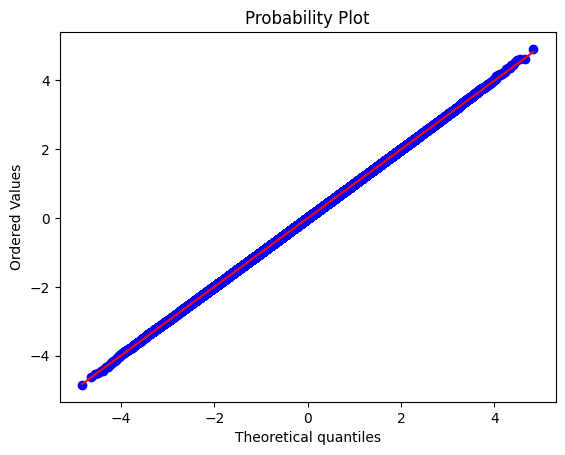

In [ ]:
# Veamos la distribución cuantil vs cuantil
import scipy.stats as stats
import pylab
stats.probplot(serie, dist="norm", plot=pylab)
pylab.show()

In [ ]:
# Una aplicación de la dististribución uniforme es incluir "ruido" en otra distribución o variable, esto lo podemos hacer sumando el valor.
N_NUMEROS = 1000000

# Con este codigo generamos valores aleatorios que se distribuyen según la distribución normal
mu = 0
sd = 1

# vamos a generar un numero grande de numeros, por ejemplo 1000 y ver que la probabilidad de aparicion es la misma para todos
a = -11
b = 12
serie_uniforme = pd.Series(np.random.randint(a, b, size=N_NUMEROS)/10 )
serie_normal = pd.Series(np.random.normal(mu, sd, size=N_NUMEROS)) + serie_uniforme


<Axes: >

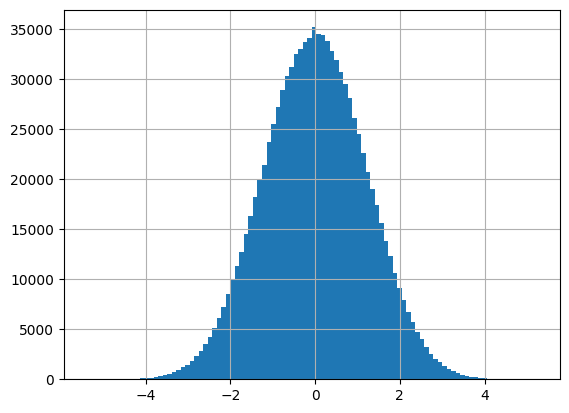

In [ ]:
# ¿Ves alguna desviacion?
serie_normal.hist(bins=100)

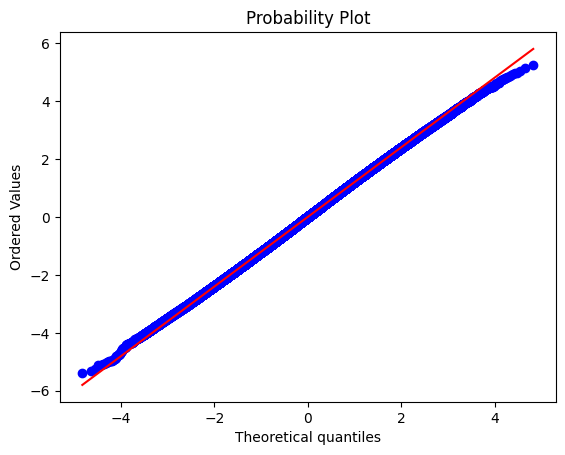

In [ ]:
# Y, ¿ahora?
stats.probplot(serie_normal, dist="norm", plot=pylab)
pylab.show()


### Teorema del límite central
Uno de los motivos por los que la distribución normal está tan presente en la naturaleza se explica gracias al teorema del límite central. Una de las formas de enunciarlo es que la media de los datos escogidos en múltiples muestras de una población se distribuirán normalmente aunque la población no se distribuya normalmente. Esto permite aplicar las asunciones en las que se basa la distribución normal para multitud de distribuciones. Aunque el teorema del límite central juega un rol muy importante en estadística, no es tan importante en el mundo del data science por una técnica que veremos más adelante. El bootstraping.

In [ ]:
# Vamos a simular el teorema del límite central

# vamos a generar un numero grande de numeros, por ejemplo 1000 y ver que la probabilidad de aparicion es la misma para todos
a = 1
b = 100
N_NUMEROS = 1000
N_ITERACIONES = 10000
list_resultados = []
for n in range(N_ITERACIONES):
  serie = pd.Series(np.random.randint(a, b, size=N_NUMEROS) )
  list_resultados.append(serie.sample(10).mean())


array([[<Axes: title={'center': '0'}>]], dtype=object)

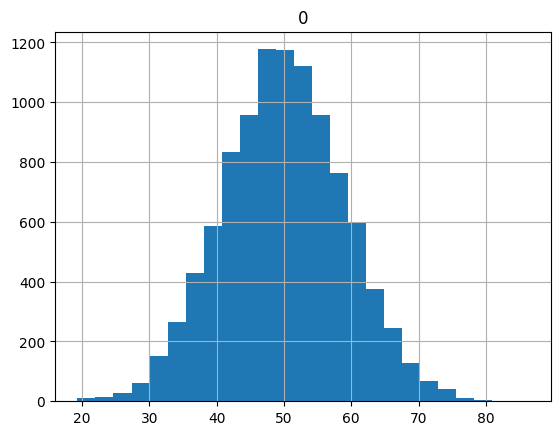

In [ ]:
pd.DataFrame(list_resultados).hist(bins=25)

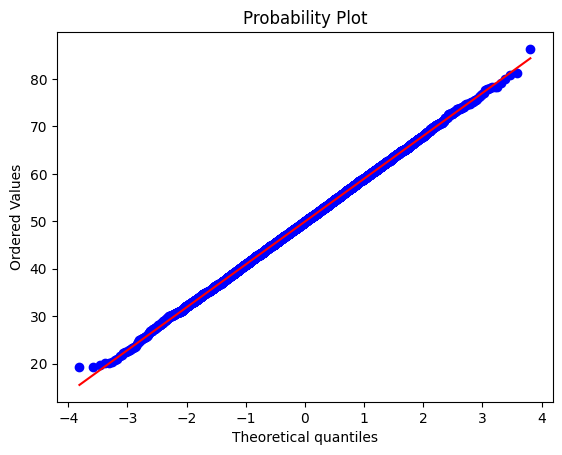

In [ ]:
# Y, ¿ahora?
stats.probplot(list_resultados, dist="norm", plot=pylab)
pylab.show()

### Distribuciones con colas pesadas
Como comentábamos anteriormente, los datos en la naturaleza no se encuentran distribuidos normalmente. Lo habitual es que sean muy asimétricos (por ejemplo los datos de riqueza de las personas), la mayor parte de los valores se concentran y el resto se distribuyen en lo que se llama una cola pesada, o que sean simétricos pero que tengan también colas pesada. Esto quiere decir que los eventos extraños son mucho más probables de ocurrir que como los describe la distribución normal.

Si te interesa este tema te recomiendo la lectura de los libros de Nassim Taleb sobre eso, especialmente el cisne negro:


<img src="https://drive.google.com/uc?id=1jsJUXNpfr4-r2VwtyosAMB6yu5OfLPsF" alt="drawing" width="300"/>

Este sería un ejemplo de cómo se distribuyen los datos según una distribución simétrica de colas pesadas:

<img src="https://drive.google.com/uc?id=1MQJgwMP0KTc_WDz00_8wkK_fmM2Ui_Fk" alt="drawing" width="300"/>




### Distribución binomial
La distribución binomial resulta muy importante en el mundo de la analítica y la decisión. Binomial, es decir con dos posibles resultados (si o no) puede indicar si un resultado es positivo o no, comprar o no comprar, impagar o no impagar, etc...

La distribución binomial nos da la probabilidad de que ocurra cierto evento x  dado un número de intento n con una probabilidad específica p.

Por ejemplo, si tuvieramos 1 monedas y quisieramos saber la probabilidad de que aparezcan 7 caras al lanzarla 10 veces estableceríamos la distribución binomial con x = 7, n = 10 y p=0.5 (ya que una moneda con dos caras tiene la misma probabilidad de que salga cara o cruz).

La media de estra distribución es n * p y la varianza n * p(1 - p).






In [ ]:
# Vamos a ver un ejemplo practico de la distribucion binomial. Una moneda tendra la siguiente distribucion binomial
# El 1 es cara y el 0 es cruz
print(np.random.binomial(n=1,p=0.5))



1


In [ ]:
# Vamos a tirar 10 monedas
diez_monedas = [np.random.binomial(n=1,p=0.5) for x in range(10)]
diez_monedas

[1, 1, 0, 1, 1, 0, 1, 1, 1, 1]

In [ ]:
# ¿Cual es el resultado mas probable al lanzar 10 monedas? Simulemos
resultado = []
for i in range(10000):
  resultado.append(np.mean([np.random.binomial(n=1,p=0.5) for x in range(10)]))
np.mean(resultado)

0.49938

In [ ]:
# ¿Y si la moneda esta trucada? Pongamos que la probabilidad de que salga cara es 0.65

resultado = []
for i in range(5000):
  resultado.append(np.mean([np.random.binomial(n=1,p=0.65) for x in range(10)]))
np.mean(resultado)

0.6496

## Bootstraping
El bootstraping es una forma práctica de calcular estadísticos de una muestra estadística. Consiste en escoger muestras con reemplazamiento adicionales, a partir de la propia muestra y calcular el estadístico para cada muestra.

Una idea que puede ayudar la técnica es imaginarse que replicamos la muestra un número enorme de veces para generar una "población sintética" y después escogemos muchas muestras de esta población para calcular los estadísticos.

El algoritmo de bootstraping para calcular la media tiene los siguientes pasos:


*   Escoger un valor de la población, guardarlo y reemplazarlo.
*   Repetir esto n veces.
*   Guarda la media de los n valores escogidos.
*   Repite los pasos anteriores R veces.
*   Utiliza los resultados de R para:

            1.   Calcular su desviación estándar (esto estima el error muestral medio)
            2.   Produce un histograma o boxplot.
            3.   Encuentra un intervalo de confianza.

Cuanto mayor sea el número de interacciones R más precisa sera la estimación del error o del intervalo de confianza. Sin embargo, llega un momento en el que seguir aumentando el número de interacciones no da mejoras significativas.






In [ ]:
# Calculemos un estadistico utilizando la tecnica del bootstraping.
# Vamos a ver la diferencia entre precio y coste entre los traspasos de jugadores de La Liga y del resto.

# Vemos los datos
df_traspasos[["player_valuje", "cost"]].head()


,player_valuje,cost
0,€42.00m,€28.00m
1,€18.00m,€20.00m
2,€50.00m,€18.00m
3,€30.00m,€17.50m
4,€10.00m,€17.00m


In [ ]:

# Primero tendremos que manipularlos, transformamos los importes a numeros
df_traspasos["player_value_tratado"] = df_traspasos["player_valuje"].str.replace("m","0.000")
df_traspasos["player_value_tratado"] = df_traspasos["player_value_tratado"].str.replace("Th",".000")
df_traspasos["player_value_tratado"] = df_traspasos["player_value_tratado"].str.replace("€","")
df_traspasos["player_value_tratado"] = df_traspasos["player_value_tratado"].str.replace(".","")
df_traspasos["player_value_tratado"] = df_traspasos["player_value_tratado"].str.replace("Loan fee:","")
df_traspasos["player_value_tratado"] = df_traspasos["player_value_tratado"].astype(float, errors="ignore")

df_traspasos["cost_tratado"] = df_traspasos["cost"].str.replace("m","0.000")
df_traspasos["cost_tratado"] = df_traspasos["cost_tratado"].str.replace("Th",".000")
df_traspasos["cost_tratado"] = df_traspasos["cost_tratado"].str.replace("€","")
df_traspasos["cost_tratado"] = df_traspasos["cost_tratado"].str.replace("-","0")
df_traspasos["cost_tratado"] = df_traspasos["cost_tratado"].str.replace(".","")
df_traspasos["cost_tratado"] = df_traspasos["cost_tratado"].str.replace("Loan fee:","")
df_traspasos["cost_tratado"] = df_traspasos["cost_tratado"].str.replace("free transfer","")
df_traspasos["cost_tratado"] = df_traspasos["cost_tratado"].astype(float, errors="ignore")
# Generamos un indicador para los jugadores de la liga
df_traspasos.loc[:,"is_LaLiga"] = 0
df_traspasos.loc[df_traspasos["league_origin_club"] == "LaLiga", "is_LaLiga"] = 1

In [ ]:
df_traspasos[["is_LaLiga","player_value_tratado", "cost_tratado"]]

,is_LaLiga,player_value_tratado,cost_tratado
0,0,42000000.0,28000000
1,1,18000000.0,20000000
2,1,50000000.0,18000000
3,0,30000000.0,17500000
4,0,10000000.0,17000000
...,...,...,...
33820,0,10000.0,0
33821,0,10000.0,0
33822,0,10000.0,0
33823,0,10000.0,0


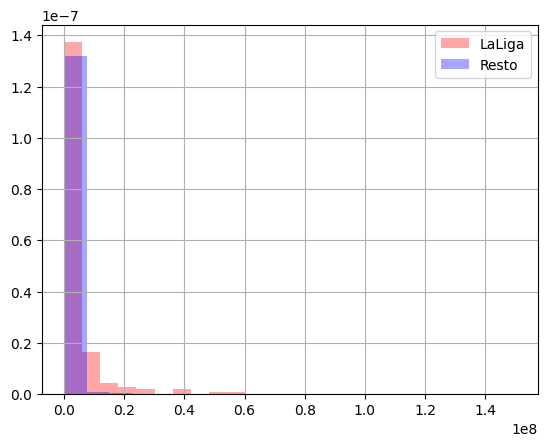

In [ ]:
# Representemos los histogramas
df_traspasos.loc[df_traspasos["is_LaLiga"] == 1, "player_value_tratado"].hist(color="red", density=True, alpha=0.35, label="LaLiga")
df_traspasos.loc[df_traspasos["is_LaLiga"] != 1, "player_value_tratado"].hist(color="blue", density=True, alpha=0.35, label="Resto", bins=20)
plt.legend()
plt.show()

In [ ]:
# Veamos que valor sale
df_traspasos.loc[df_traspasos["is_LaLiga"] == 1, "player_value_tratado"].median() - df_traspasos.loc[df_traspasos["is_LaLiga"] != 1, "player_value_tratado"].median()

1400000.0

In [ ]:
R_iteraciones = 1000
r_resultado = []
for r in range(R_iteraciones):
  muestra_con_reemplazamiento = df_traspasos.sample(frac=0.6, replace=True).loc[:, ["player_value_tratado","cost_tratado"]]
  median_laliga = muestra_con_reemplazamiento.loc[df_traspasos["is_LaLiga"] == 1, "player_value_tratado"].median()
  median_no_laliga = muestra_con_reemplazamiento.loc[df_traspasos["is_LaLiga"] != 1, "player_value_tratado"].median()
  r_resultado.append(median_laliga - median_no_laliga)

array([[<Axes: title={'center': '0'}>]], dtype=object)

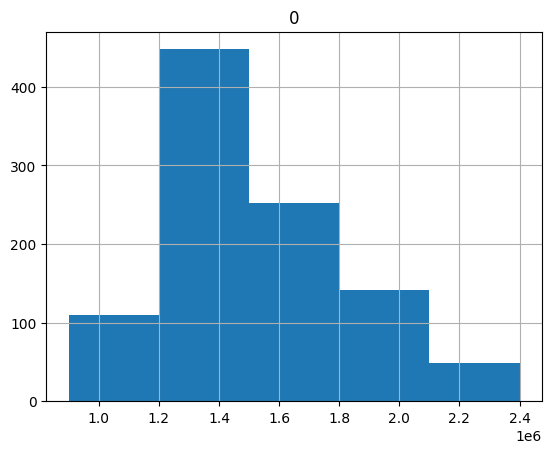

In [ ]:
pd.DataFrame(r_resultado).hist(bins=5)

In [ ]:
# El resultado medio de la diferencia de medianas seria
np.mean(r_resultado)

1538700.0

### Intervalos de confianza
Los intervalos de confianza nos permiten ofrecer un resultado no como un número si no como un rango y una precisión. Esto ayuda a comunicar nuestro resultados con mayor robustez y de forma más fiable.

Los intervalos de confianza vienen con un porcentaje de cobertura (normalmente alto), digamos 90%, 95%. Para un porcentaje de cobertura del 90% se puede entender como el intevalo que encierra el 90% de la distribución muestral que se obtiene al hacer bootstraping.

Dada una muestra de tamaño n, y un estadístico muestral de iterés (la media, la desviación estándar...), el algoritmo para calcular el intervalo de confianza utilizando el bootstrapping.


1.   Escoge una muestra aleatoria de tamaño n con reemplazamiento a partir de los datos.
2.   Guarda el estadístico de interés de esta muestra.
3.   Repite los pasos anteriores R veces.
4.   Para un intervalo de confianza del x%, corta la distribución por cada final según [(100-x)/2]%.
5.   Los puntos calculados son los finales del intervalo de confianza del x%.

<img src="https://drive.google.com/uc?id=1xeay0PX2JzykgC6Cxf0xgoPSJEtTEah9" alt="drawing" width="300"/>








In [ ]:
# Calculemos intervalos de confianza utilizando la tecnica del bootstraping
# Veamos el intervalo de confianza del 90%
pd.DataFrame(r_resultado).quantile([0.5,0.95])


,0
0.50,1400000.0
0.95,1900000.0
